## Preprocessing Data

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load data

In [2]:
df=pd.read_csv("../data/raw/food_coded.csv")

#print shape of the dataframe with rows and columns with text explanation
print(f'dataframe shape consists of {df.shape[0]} rows and {df.shape[1]} columns')

#show the first 5 rows of the dataframe
print(df.head())

dataframe shape consists of 125 rows and 61 columns
     GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0    2.4       2          1               430           NaN           315.0   
1  3.654       1          1               610           3.0           420.0   
2    3.3       1          1               720           4.0           420.0   
3    3.2       1          1               430           3.0           420.0   
4    3.5       1          1               720           2.0           420.0   

   coffee                      comfort_food        comfort_food_reasons  \
0       1                              none       we dont have comfort    
1       2       chocolate, chips, ice cream        Stress, bored, anger   
2       2   frozen yogurt, pizza, fast food             stress, sadness   
3       2  Pizza, Mac and cheese, ice cream                     Boredom   
4       2      Ice cream, chocolate, chips   Stress, boredom, cravings    

   comfort_food_reason

In [3]:
#print all columns
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

Checking for duplicated rows

In [4]:
print(f'we have {df.duplicated().sum()} duplicated rows')

we have 0 duplicated rows


Features selection

In [5]:
selected_features=['cook' ,'eating_out', 'employment', 'ethnic_food', 'exercise', 'father_education',
                   'fav_food', 'fruit_day', 'income','mother_education', 'on_off_campus',
                   'parents_cook', 'pay_meal_out', 'sports', 'veggies_day']
df_filtered=df[selected_features]
df_filtered.head()

,cook,eating_out,employment,ethnic_food,exercise,father_education,fav_food,fruit_day,income,mother_education,on_off_campus,parents_cook,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5.0,1.0,5,5.0,1.0,1.0,1,2,1.0,5
1,3.0,2,2.0,4,1.0,2.0,1.0,4,4.0,4.0,1.0,1,4,1.0,4
2,1.0,2,3.0,5,2.0,2.0,3.0,5,6.0,2.0,2.0,1,3,2.0,5
3,2.0,2,3.0,5,3.0,2.0,1.0,4,6.0,4.0,1.0,1,2,2.0,3
4,1.0,2,2.0,4,1.0,4.0,3.0,4,6.0,5.0,1.0,1,4,1.0,4


In [14]:
#check for missing values
df_filtered.isnull().sum()

cook                 3
eating_out           0
employment           9
ethnic_food          0
exercise            13
father_education     1
fav_food             2
fruit_day            0
income               1
mother_education     3
on_off_campus        1
parents_cook         0
pay_meal_out         0
sports               2
veggies_day          0
dtype: int64

In [18]:
# since our data is relatively small, we can not tolerate dropping any rows, so we will fill the missing values
# since the data is categorical, we will fill the missing values with the mode of the column 
for col in df_filtered.columns:
    df_filtered[col]=df[col].fillna(df_filtered[col].mode()[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_16284\1441023687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col]=df[col].fillna(df_filtered[col].mode()[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_16284\1441023687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col]=df[col].fillna(df_filtered[col].mode()[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_16284\1441023687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [19]:
#check missing values again
df_filtered.isnull().sum()

cook                0
eating_out          0
employment          0
ethnic_food         0
exercise            0
father_education    0
fav_food            0
fruit_day           0
income              0
mother_education    0
on_off_campus       0
parents_cook        0
pay_meal_out        0
sports              0
veggies_day         0
dtype: int64

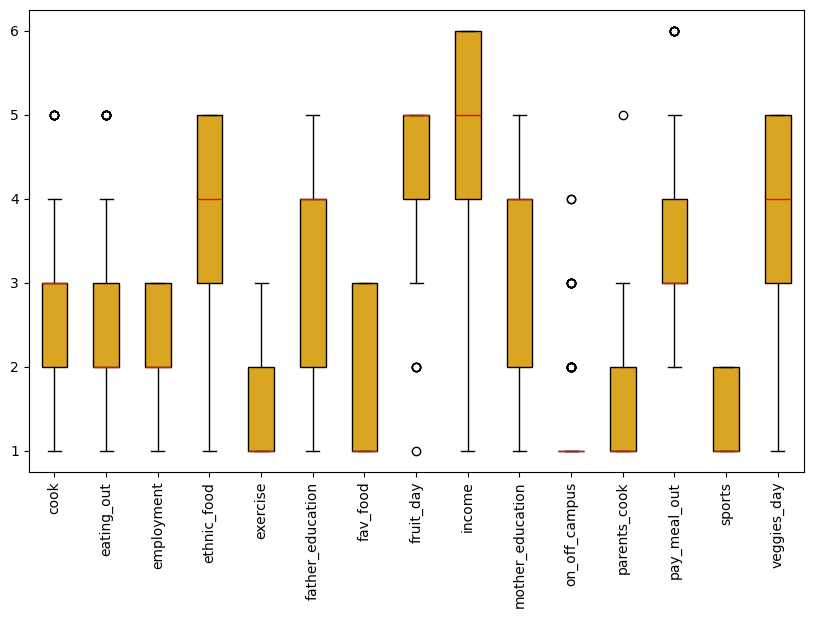

In [33]:
#boxplot for the selected features
fig, ax = plt.subplots(figsize=(10, 6))
bp = plt.boxplot(df_filtered,labels=selected_features,patch_artist=True,notch=False,
                 boxprops=dict(facecolor="goldenrod", color="black"),
                 capprops=dict(color="black"),
                 whiskerprops=dict(color="black"),
                 medianprops=dict(color="red"))

plt.xticks(rotation=90)
plt.show()

Most students live in campus

In [27]:
df_filtered['on_off_campus'].value_counts()

on_off_campus
1.0    98
2.0    16
3.0     9
4.0     2
Name: count, dtype: int64

In [34]:
df_filtered[(df_filtered['on_off_campus']!=1)]

,cook,eating_out,employment,ethnic_food,exercise,father_education,fav_food,fruit_day,income,mother_education,on_off_campus,parents_cook,pay_meal_out,sports,veggies_day
2,1.0,2,3.0,5,2.0,2.0,3.0,5,6.0,2.0,2.0,1,3,2.0,5
6,2.0,2,3.0,5,1.0,4.0,1.0,4,4.0,4.0,2.0,2,2,1.0,4
10,1.0,2,1.0,5,1.0,2.0,1.0,5,3.0,4.0,3.0,1,2,1.0,5
13,2.0,4,2.0,5,2.0,2.0,1.0,5,5.0,4.0,2.0,2,3,1.0,5
14,3.0,2,3.0,4,2.0,4.0,3.0,5,5.0,4.0,2.0,2,3,1.0,5
30,3.0,3,2.0,4,2.0,2.0,2.0,3,5.0,5.0,3.0,3,3,1.0,5
31,2.0,2,3.0,5,2.0,4.0,1.0,5,4.0,2.0,4.0,1,3,2.0,5
35,1.0,2,3.0,2,1.0,4.0,1.0,5,4.0,4.0,2.0,1,3,1.0,5
39,5.0,5,3.0,3,1.0,5.0,1.0,5,6.0,2.0,2.0,3,3,1.0,3
44,1.0,2,2.0,5,1.0,4.0,1.0,5,5.0,2.0,2.0,1,6,1.0,5


In [ ]:
df_filtered.to_csv('../data/df.csv', index=False)